In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv


In [2]:
df = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv')

In [3]:
recent_cases = df.loc[1644:1719] #Locate just the most recent cases in the data set

In [4]:
recent_cases 

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1644,1645,02/17/2020 22:00:00,Hubei,Mainland China,2020-02-17T23:13:06,59989.0,1789.0,7862.0
1645,1646,02/17/2020 22:00:00,Guangdong,Mainland China,2020-02-17T12:43:02,1322.0,4.0,524.0
1646,1647,02/17/2020 22:00:00,Henan,Mainland China,2020-02-17T14:53:02,1246.0,16.0,509.0
1647,1648,02/17/2020 22:00:00,Zhejiang,Mainland China,2020-02-17T11:23:06,1171.0,0.0,507.0
1648,1649,02/17/2020 22:00:00,Hunan,Mainland China,2020-02-17T11:43:01,1006.0,3.0,498.0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0


In [5]:
final_recent_cases = recent_cases[~recent_cases.Country.str.contains("Others")] #Deleting the Cruise ship data

In [6]:
confirmed_countries = final_recent_cases.groupby('Country').sum() #Grouping by country

In [7]:
top_10 = confirmed_countries.nlargest(10,'Confirmed') #Getting top 10

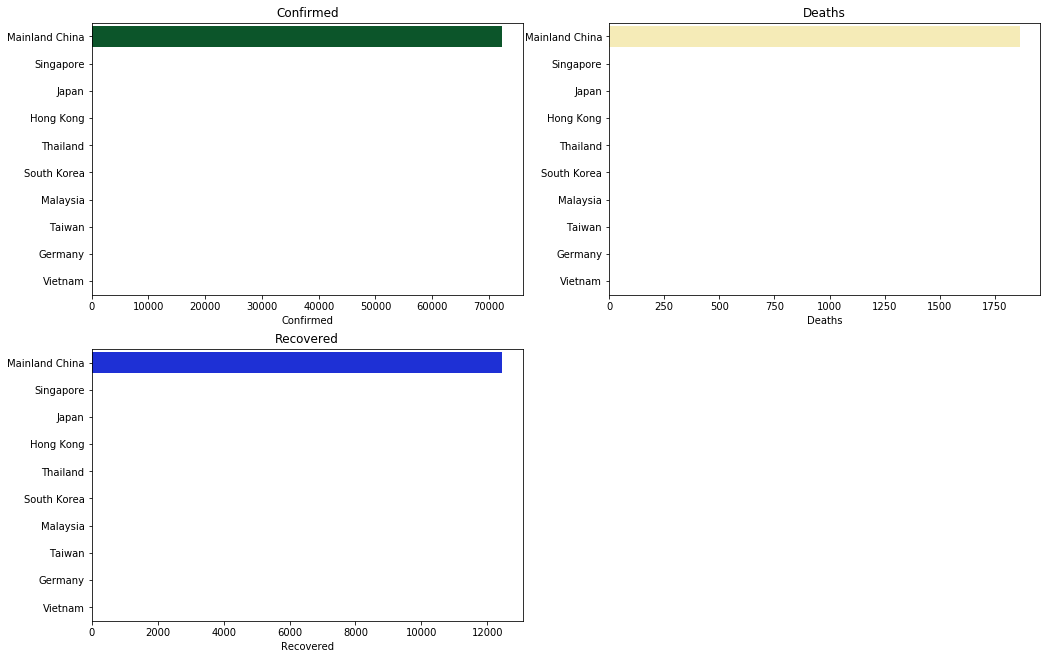

In [23]:
statuses = top_10[['Confirmed','Deaths','Recovered']] #Put statuses into a variable
list_types = statuses.index.unique().tolist() #Get Countries into a list
i= 1 #Set variable to distribute subplots
c=0 #set variable to distribute palettes
palette=['BuGn_r','YlOrRd','winter']
plt.figure(figsize=(17,17))


for status in statuses: #function to make a chart for each status
    plt.subplot(3,2,i)
    i=i+1
    sns.barplot(x =statuses[status], y=list_types,palette = palette[c])
    c=c+1
    
    plt.title(str(status))


In [11]:
recent_china = recent_cases[recent_cases['Country'] == 'Mainland China']

In [25]:
recent_china.nlargest(10,'Confirmed')


,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1644,1645,02/17/2020 22:00:00,Hubei,Mainland China,2020-02-17T23:13:06,59989.0,1789.0,7862.0
1645,1646,02/17/2020 22:00:00,Guangdong,Mainland China,2020-02-17T12:43:02,1322.0,4.0,524.0
1646,1647,02/17/2020 22:00:00,Henan,Mainland China,2020-02-17T14:53:02,1246.0,16.0,509.0
1647,1648,02/17/2020 22:00:00,Zhejiang,Mainland China,2020-02-17T11:23:06,1171.0,0.0,507.0
1648,1649,02/17/2020 22:00:00,Hunan,Mainland China,2020-02-17T11:43:01,1006.0,3.0,498.0
1649,1650,02/17/2020 22:00:00,Anhui,Mainland China,2020-02-17T09:13:07,973.0,6.0,280.0
1650,1651,02/17/2020 22:00:00,Jiangxi,Mainland China,2020-02-17T01:33:02,930.0,1.0,275.0
1651,1652,02/17/2020 22:00:00,Jiangsu,Mainland China,2020-02-17T10:23:04,626.0,0.0,258.0
1652,1653,02/17/2020 22:00:00,Chongqing,Mainland China,2020-02-17T23:13:06,553.0,5.0,225.0
1653,1654,02/17/2020 22:00:00,Shandong,Mainland China,2020-02-17T11:03:06,541.0,2.0,191.0


In [27]:
china_top_10 = recent_china.nlargest(10,'Confirmed')

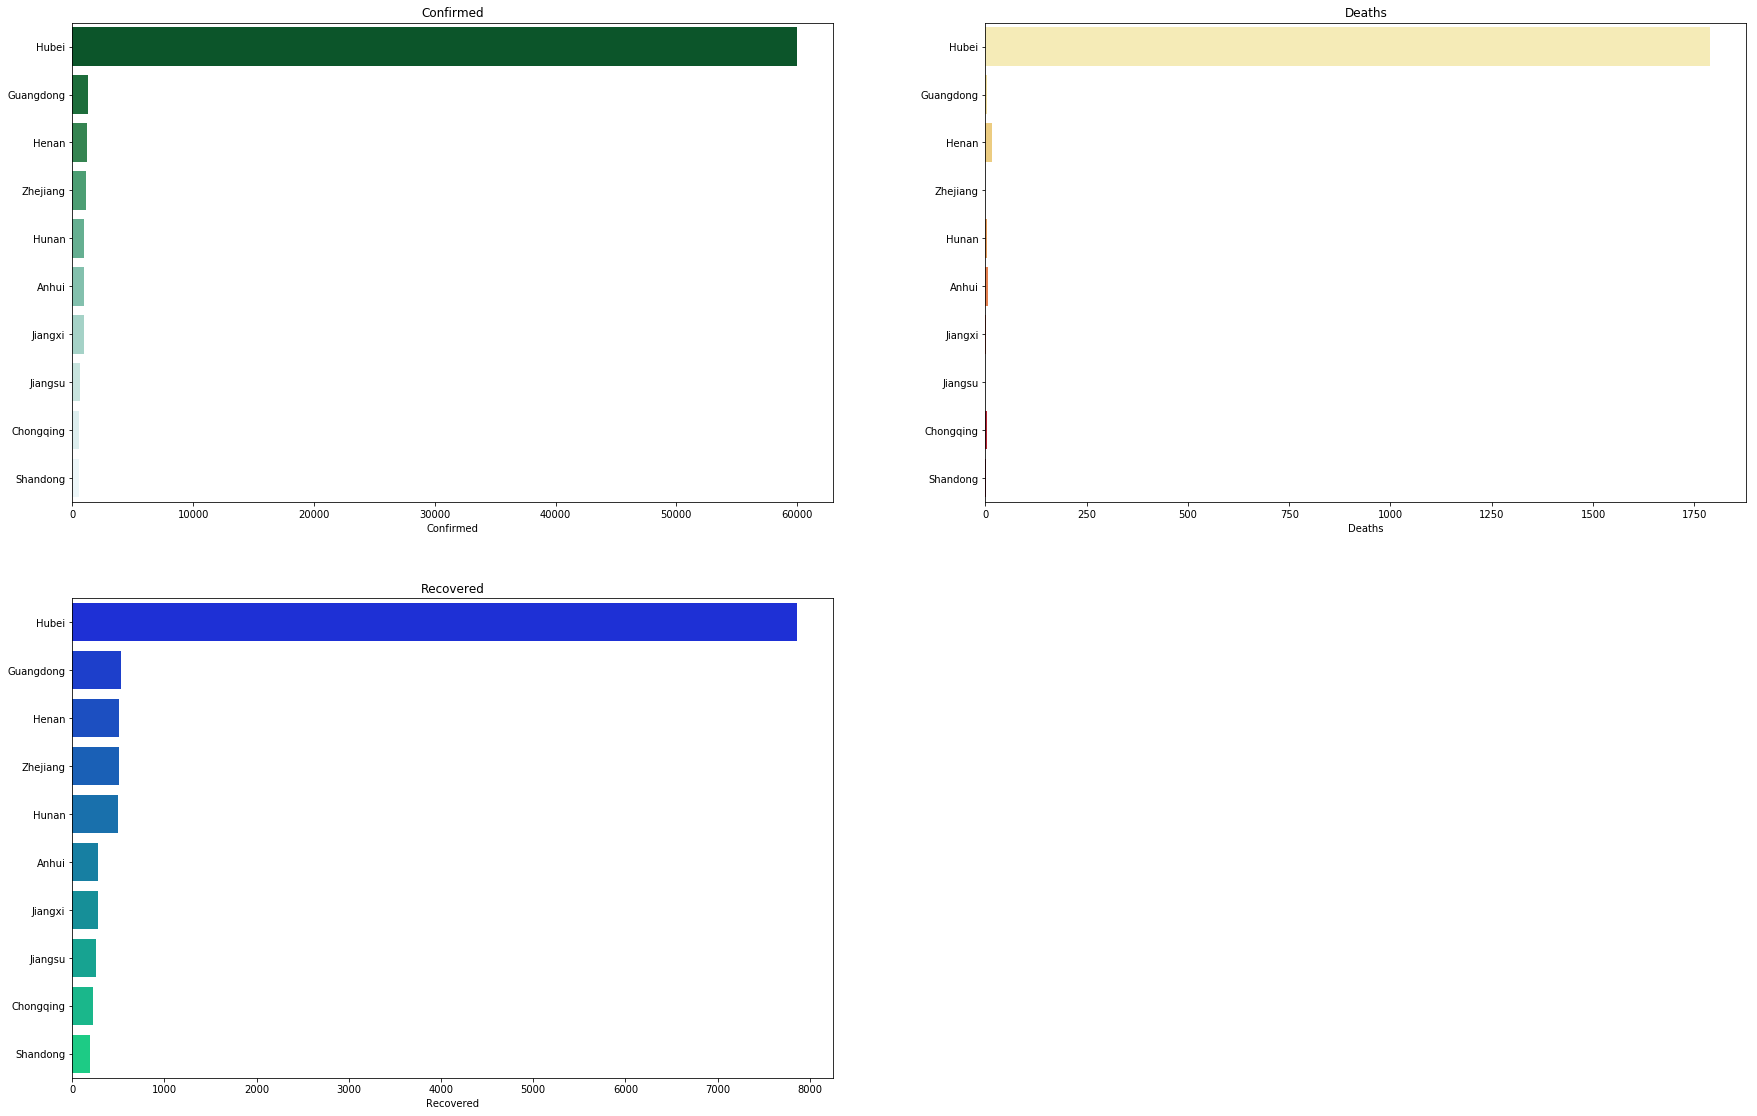

In [33]:
statuses = china_top_10[['Confirmed','Deaths','Recovered']] #Put statuses into a variable
list_types = china_top_10['Province/State'].tolist()#Get Provinces into a list
i= 1 #Set variable to distribute subplots
c=0 #set variable to distribute palettes
palette=['BuGn_r','YlOrRd','winter']
plt.figure(figsize=(30,30))


for status in statuses: #function to make a chart for each status
    plt.subplot(3,2,i)
    i=i+1
    sns.barplot(x =statuses[status], y=list_types,palette = palette[c])
    c=c+1
    
    plt.title(str(status))